In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
np.random.seed(42)

In [2]:
df = pd.read_csv('../data/final_work_data.csv')

In [3]:
df.shape

(2619, 28)

In [4]:
pd.set_option('display.max_columns', 35)

### Identification of the interaction columns worth including into the model

In [5]:
#identifying the interactions that are worth analyzing excluding the unrelated string columns
test = []
train = []
cross = []
neg = [-1, -.95, -.9, -.85, -.8, -.75, -.7, -.65, -.6, -.55, -.5, -.45, -.4, -.35, -.3, -.25, -.2, -.15, -.1, -.05]
pos = [1, .95, .9, .85, .8, .75, .7, .65, .6, .55, .5, .45, .4, .35, .3, .25, .2, .15, .1, .05]
#looping through correlations limits
for z in neg:
    for v in pos:
        interaction = []
        df1 = df.copy()
        df1 = df1.drop(columns=['state', 'county_name', 'unemployment_rate_2010', 'population_total_2010'])
        for i in list(df1.corr().columns):
            for j in list(df1.corr().index):
                if ((df1.corr().loc[j, i] < z  and df1.corr().loc[j, i] != -1) or (df1.corr().loc[j, i] > v and df1.corr().loc[j, i] != 1)) and j != i:
                        interaction.append((j, i))

        # creating the columns with identified interactions
        for a in interaction:
            df1[a[0]+'_'+a[1]] = df1[a[0]] * df1[a[1]]

        #saving the dataframe to feed into the model
        #df.to_csv('../data/final_preprocessed_data_with_polynomials.csv')

        X = df1#.drop(columns = ['state', 'county_name', 'unemployment_rate_2010', 'population_total_2010'])
        y = df['unemployment_rate_2010']

        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

        ss = StandardScaler()
        Z_train = ss.fit_transform(X_train)
        Z_test = ss.transform(X_test)

        lr = LinearRegression()
        lr.fit(Z_train, y_train)
        if not lr.score(Z_test, y_test) < 0 and not cross_val_score(lr, Z_train, y_train).mean() < 0:
            test.append((z, v, lr.score(Z_train, y_train)))
            train.append((z, v, lr.score(Z_test, y_test)))
            cross.append((z, v, cross_val_score(lr, Z_train, y_train).mean()))
        print('z:' + str(z) + '; v:' + str(v) + "; train: " + str(lr.score(Z_train, y_train)) + "; test: " + str(lr.score(Z_test, y_test)) + "; cross: " + str(cross_val_score(lr, Z_train, y_train).mean()))

z:-1; v:1; train: 0.4373049204624846; test: 0.41413926865430983; cross: 0.3983269870364597
z:-1; v:0.95; train: 0.4373049204624846; test: 0.41413926865430983; cross: 0.3983269870364597
z:-1; v:0.9; train: 0.4373049204624846; test: 0.41413926865430983; cross: 0.3983269870364597
z:-1; v:0.85; train: 0.4373049204624846; test: 0.41413926865430983; cross: 0.3983269870364597
z:-1; v:0.8; train: 0.4373049204624846; test: 0.41413926865430983; cross: 0.3983269870364597
z:-1; v:0.75; train: 0.4373049204624846; test: 0.41413926865430983; cross: 0.3983269870364597
z:-1; v:0.7; train: 0.4373049204624846; test: 0.41413926865430983; cross: 0.3983269870364597
z:-1; v:0.65; train: 0.4373049204624846; test: 0.41413926865430983; cross: 0.3983269870364597
z:-1; v:0.6; train: 0.437896084574701; test: 0.41639484299719387; cross: 0.39858070992106376
z:-1; v:0.55; train: 0.4383639358134487; test: 0.415646635280959; cross: 0.39846265190682895
z:-1; v:0.5; train: 0.4392849521335792; test: 0.41535289698285827; c

z:-0.8; v:0.7; train: 0.4424336688199675; test: 0.34604182263051975; cross: 0.40397580063168376
z:-0.8; v:0.65; train: 0.4424336688199675; test: 0.34604182263051975; cross: 0.40397580063168376
z:-0.8; v:0.6; train: 0.4425436511494212; test: 0.34587480536869586; cross: 0.40364601363767905
z:-0.8; v:0.55; train: 0.44292778688511525; test: 0.3460586647306976; cross: 0.40342665910963316
z:-0.8; v:0.5; train: 0.44659299640643124; test: 0.2795157457594084; cross: 0.4091198573011409
z:-0.8; v:0.45; train: 0.4507595586729113; test: 0.26411183519390125; cross: 0.41010790449677204
z:-0.8; v:0.4; train: 0.45650572568726544; test: 0.3564850486771308; cross: 0.40283242757781607
z:-0.8; v:0.35; train: 0.48366410856063813; test: 0.3543548530357743; cross: 0.4341360968241381
z:-0.8; v:0.3; train: 0.5032610783976617; test: 0.39343898946646816; cross: 0.44748305580452213
z:-0.8; v:0.25; train: 0.52894789785802; test: 0.42614007258171427; cross: 0.4602596485114253
z:-0.8; v:0.2; train: 0.5425522967547671

z:-0.6; v:0.4; train: 0.4859212912337766; test: 0.39413007699142555; cross: 0.4289440222269273
z:-0.6; v:0.35; train: 0.5009063353466747; test: 0.38793012435728635; cross: 0.4416989571544779
z:-0.6; v:0.3; train: 0.516068014530028; test: 0.40403575514725565; cross: 0.4509706677501528
z:-0.6; v:0.25; train: 0.5311464882239164; test: 0.41899092020996975; cross: 0.46495176998294563
z:-0.6; v:0.2; train: 0.5482899567605561; test: 0.4228902464484535; cross: 0.44336684315641806
z:-0.6; v:0.15; train: 0.5577016380320543; test: 0.33618535098435964; cross: 0.44047670611783596
z:-0.6; v:0.1; train: 0.5770430744970081; test: 0.40229420637788726; cross: -8097440469091.26
z:-0.6; v:0.05; train: 0.594326953715127; test: -0.16058850602801922; cross: -13378698292872.744
z:-0.55; v:1; train: 0.4653432930122563; test: 0.38599835022128237; cross: 0.42527258239578564
z:-0.55; v:0.95; train: 0.4653432930122563; test: 0.38599835022128237; cross: 0.42527258239578564
z:-0.55; v:0.9; train: 0.4653432930122563;

z:-0.4; v:0.1; train: 0.5853903669831961; test: -1.9487562620133188e+22; cross: -7.785342024382456e+19
z:-0.4; v:0.05; train: 0.6025737869514698; test: -1.5131636437834808e+22; cross: -6.452952468947643e+19
z:-0.35; v:1; train: 0.49064371154249453; test: 0.3266175719680532; cross: 0.45411060405297654
z:-0.35; v:0.95; train: 0.49064371154249453; test: 0.3266175719680532; cross: 0.45411060405297654
z:-0.35; v:0.9; train: 0.49064371154249453; test: 0.3266175719680532; cross: 0.45411060405297654
z:-0.35; v:0.85; train: 0.49064371154249453; test: 0.3266175719680532; cross: 0.45411060405297654
z:-0.35; v:0.8; train: 0.49064371154249453; test: 0.3266175719680532; cross: 0.45411060405297654
z:-0.35; v:0.75; train: 0.49064371154249453; test: 0.3266175719680532; cross: 0.45411060405297654
z:-0.35; v:0.7; train: 0.49064371154249453; test: 0.3266175719680532; cross: 0.45411060405297654
z:-0.35; v:0.65; train: 0.49064371154249453; test: 0.3266175719680532; cross: 0.45411060405297654
z:-0.35; v:0.6;

z:-0.15; v:0.95; train: 0.5418183304624875; test: 0.47330134385388845; cross: 0.3164278803711218
z:-0.15; v:0.9; train: 0.5418183304624875; test: 0.47330134385388845; cross: 0.3164278803711218
z:-0.15; v:0.85; train: 0.5418183304624875; test: 0.47330134385388845; cross: 0.3164278803711218
z:-0.15; v:0.8; train: 0.5418183304624875; test: 0.47330134385388845; cross: 0.3164278803711218
z:-0.15; v:0.75; train: 0.5418183304624875; test: 0.47330134385388845; cross: 0.3164278803711218
z:-0.15; v:0.7; train: 0.5418183304624875; test: 0.47330134385388845; cross: 0.3164278803711218
z:-0.15; v:0.65; train: 0.5418183304624875; test: 0.47330134385388845; cross: 0.3164278803711218
z:-0.15; v:0.6; train: 0.5419684740532988; test: 0.474826973850509; cross: 0.29706243245368175
z:-0.15; v:0.55; train: 0.5423721886433226; test: 0.471636620088546; cross: 0.3023754577567068
z:-0.15; v:0.5; train: 0.54575149761688; test: 0.44486162310691224; cross: -83526185895.6665
z:-0.15; v:0.45; train: 0.546320142663155

In [6]:
maximum =-999

for num in train:
    if num[2] > maximum:
        maximum=num[2]
maximum
for num in train:
    if num[2]==maximum:
        print("train: " + str(num))
        for klm in test:
            if klm[0] == num[0] and klm[1] == num[1]:
                print("test: " + str(klm))
        for mmm in cross:
            if mmm[0] == num[0] and mmm[1] == num[1]:
                print("cross: " + str(mmm))

train: (-0.2, 0.6, 0.48682248198491396)
test: (-0.2, 0.6, 0.5388625710333952)
cross: (-0.2, 0.6, 0.25582971916580577)


In [7]:
maximum2 =-999

for num2 in test:
    if num2[2] > maximum2:
        maximum2=num2[2]
maximum2
for num2 in test:
    if num2[2]==maximum2:
        print("test: " + str(num2))
        for klm in train:
            if klm[0] == num2[0] and klm[1] == num2[1]:
                print("train: " + str(klm))
        for mmm in cross:
            if mmm[0] == num2[0] and mmm[1] == num2[1]:
                print("cross: " + str(mmm))

test: (-0.5, 0.15, 0.5607555703300493)
train: (-0.5, 0.15, 0.34293125898288834)
cross: (-0.5, 0.15, 0.45542799057578226)


In [8]:
maximum3 =-999

for num3 in cross:
    if num3[2] > maximum3:
        maximum3=num3[2]
maximum3
for num3 in cross:
    if num3[2]==maximum3:
        print("cross: " + str(num3))
        for klm in train:
            if klm[0] == num3[0] and klm[1] == num3[1]:
                print("train: " + str(klm))
        for mmm in test:
            if mmm[0] == num3[0] and mmm[1] == num3[1]:
                print("test: " + str(mmm))

cross: (-0.3, 1, 0.49190707390748933)
train: (-0.3, 1, 0.3833562225232172)
test: (-0.3, 1, 0.5312905566983965)
cross: (-0.3, 0.95, 0.49190707390748933)
train: (-0.3, 0.95, 0.3833562225232172)
test: (-0.3, 0.95, 0.5312905566983965)
cross: (-0.3, 0.9, 0.49190707390748933)
train: (-0.3, 0.9, 0.3833562225232172)
test: (-0.3, 0.9, 0.5312905566983965)
cross: (-0.3, 0.85, 0.49190707390748933)
train: (-0.3, 0.85, 0.3833562225232172)
test: (-0.3, 0.85, 0.5312905566983965)
cross: (-0.3, 0.8, 0.49190707390748933)
train: (-0.3, 0.8, 0.3833562225232172)
test: (-0.3, 0.8, 0.5312905566983965)
cross: (-0.3, 0.75, 0.49190707390748933)
train: (-0.3, 0.75, 0.3833562225232172)
test: (-0.3, 0.75, 0.5312905566983965)
cross: (-0.3, 0.7, 0.49190707390748933)
train: (-0.3, 0.7, 0.3833562225232172)
test: (-0.3, 0.7, 0.5312905566983965)
cross: (-0.3, 0.65, 0.49190707390748933)
train: (-0.3, 0.65, 0.3833562225232172)
test: (-0.3, 0.65, 0.5312905566983965)


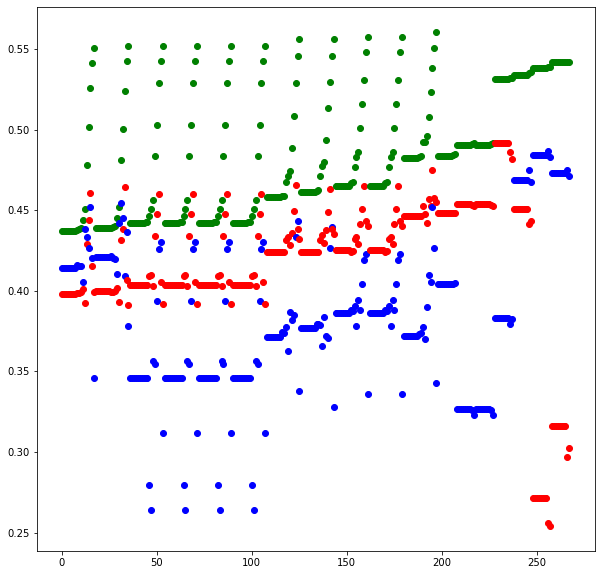

In [11]:
plt.figure(figsize=(10,10))
for i in range(len(test)):
    plt.scatter(i, train[i][2], color='blue')
    plt.scatter(i, test[i][2], color='green')
    plt.scatter(i, cross[i][2], color='red')

In [13]:
#identifying the index with the maximum sum of train, test and cross_val scores
maxim = -999
for i in range(len(test)):
    if (test[i][2] + train[i][2] + cross[i][2]) > maxim:
        maxim=(test[i][2] + train[i][2] + cross[i][2])
for i in range(len(test)):
    if (test[i][2] + train[i][2] + cross[i][2]) == maxim:
        print(i)

195


In [14]:
train[195], test[195], cross[195]

((-0.5, 0.25, 0.4520140123788815),
 (-0.5, 0.25, 0.5382151586648083),
 (-0.5, 0.25, 0.4747937612381934))

In [15]:
#-0.5, 0.25
df = pd.read_csv('../data/final_work_data.csv')
interaction2 = []
df2 = df.copy()
df2 = df2.drop(columns=['state', 'county_name', 'unemployment_rate_2010', 'population_total_2010'])
for i in list(df2.corr().columns):
    for j in list(df2.corr().index):
        if ((df2.corr().loc[j, i] < -.5  and df2.corr().loc[j, i] != -1) or (df2.corr().loc[j, i] > .25 and df2.corr().loc[j, i] != 1)) and j != i:
            interaction2.append((j, i))

# creating the columns with identified interactions
for a in interaction2:
    df[a[0]+'_'+a[1]] = df[a[0]] * df[a[1]]

#exporting the dataframe with optimal features for modelling
df.to_csv('../data/full_data_interaction_05_025.csv')